Put to practice the following concepts:

- Feature engineering
    - Polynomial features
- Model evaluation
- Grid and CrossValidation
- Mutual information
- PCA

In [1]:
# Import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [2]:
# Load data into dataframes

df_household = pd.read_csv('avg-household-size.csv')
df_data = pd.read_csv('cancer_reg.csv')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3047 non-null   int64  
 1   avganncount              3047 non-null   float64
 2   avgdeathsperyear         3047 non-null   int64  
 3   target_deathrate         3047 non-null   float64
 4   incidencerate            3047 non-null   float64
 5   medincome                3047 non-null   int64  
 6   popest2015               3047 non-null   int64  
 7   povertypercent           3047 non-null   float64
 8   studypercap              3047 non-null   float64
 9   binnedinc                3047 non-null   object 
 10  medianage                3047 non-null   float64
 11  medianagemale            3047 non-null   float64
 12  medianagefemale          3047 non-null   float64
 13  geography                3047 non-null   object 
 14  percentmarried          

In [4]:
df_data.describe()

,index,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,1523.000000,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,879.737461,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,0.000000,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,761.500000,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,1523.000000,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,2284.500000,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,3046.000000,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [5]:
# Drop index column

df_data = df_data.drop('index', axis=1)

In [6]:
# Create a copy of data

df_copy = df_data.copy()

In [7]:
# Subset for categorical features and code

cat = (df_data.dtypes == 'object')
cat_col = cat[cat].index

# Change on of the two categorical variables to integers
df_data[cat_col[1]] = df_data[cat_col[1]].astype('category')
df_data[cat_col[1]] = df_data[cat_col[1]].cat.codes

In [8]:
df_data['binnedinc'].unique()

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [9]:
# Manual ordinal encoding using map feature

df_data['binnedinc'] = df_data['binnedinc'].map({'(61494.5, 125635]':9, '(48021.6, 51046.4]':6, '(42724.4, 45201]':4,
       '(51046.4, 54545.6]':7, '(37413.8, 40362.7]':2, '(40362.7, 42724.4]':3,
       '(54545.6, 61494.5]':8, '(34218.1, 37413.8]':1, '[22640, 34218.1]':0,
       '(45201, 48021.6]':5})

In [10]:
# Check for Duplicates 

df_data.duplicated().sum()

0

In [11]:
# Check for columns with missing data

nul = df_data.isnull().sum() != 0

mis_col = nul[nul].index

mis_col

Index(['pctsomecol18_24', 'pctemployed16_over', 'pctprivatecoveragealone'], dtype='object')

In [12]:
df_data[mis_col].isnull().sum()

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64

In [13]:
# Drop columns with multiple missing observations

df_data = df_data.drop('pctsomecol18_24', axis=1)

In [14]:
# Fill missing data slots

df_data['pctemployed16_over'].fillna(df_data['pctemployed16_over'].mean(), inplace=True)

df_data['pctprivatecoveragealone'].fillna(df_data['pctprivatecoveragealone'].mean(), inplace=True)


### Exploratory Data Analysis

In [15]:
df_copy.sample(4).T

,588,409,2372,1623
avganncount,84.0,243.0,267.0,789.0
avgdeathsperyear,32,93,108,295
target_deathrate,153.3,161.4,176.1,159.2
incidencerate,400.2,440.0,464.1,437.3
medincome,48006,37884,41319,59382
popest2015,21482,34201,52521,164427
povertypercent,14.3,18.1,22.9,13.2
studypercap,0.0,0.0,476.000076,395.312205
binnedinc,"(45201, 48021.6]","(37413.8, 40362.7]","(40362.7, 42724.4]","(54545.6, 61494.5]"
medianage,34.0,49.0,33.3,37.7


<AxesSubplot:xlabel='binnedinc', ylabel='target_deathrate'>

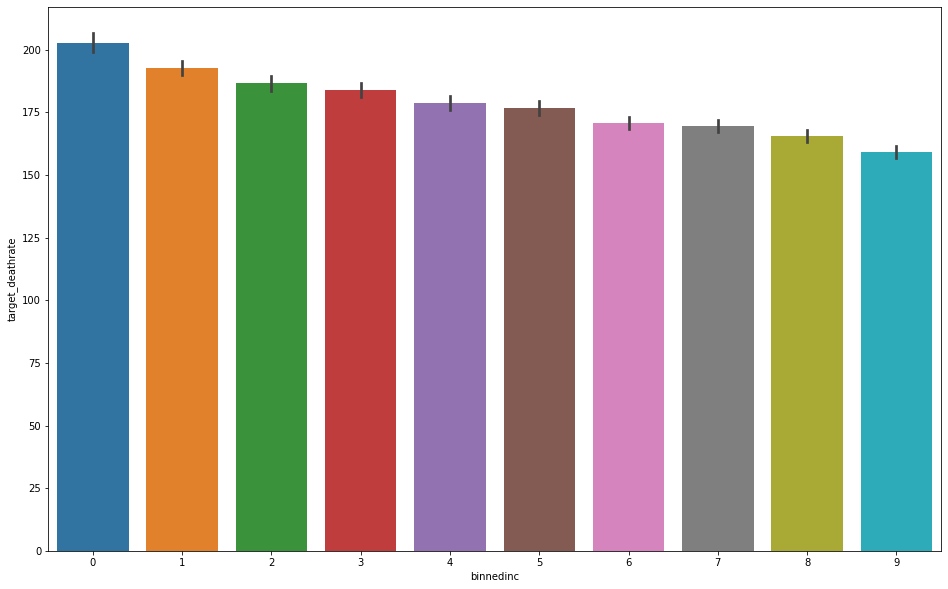

In [16]:
plt.figure(figsize=(16, 10))

sns.barplot(x= 'binnedinc', y='target_deathrate',
            data=df_data)

Death rate is relatively higher in countries in the lower income category

<AxesSubplot:xlabel='binnedinc', ylabel='birthrate'>

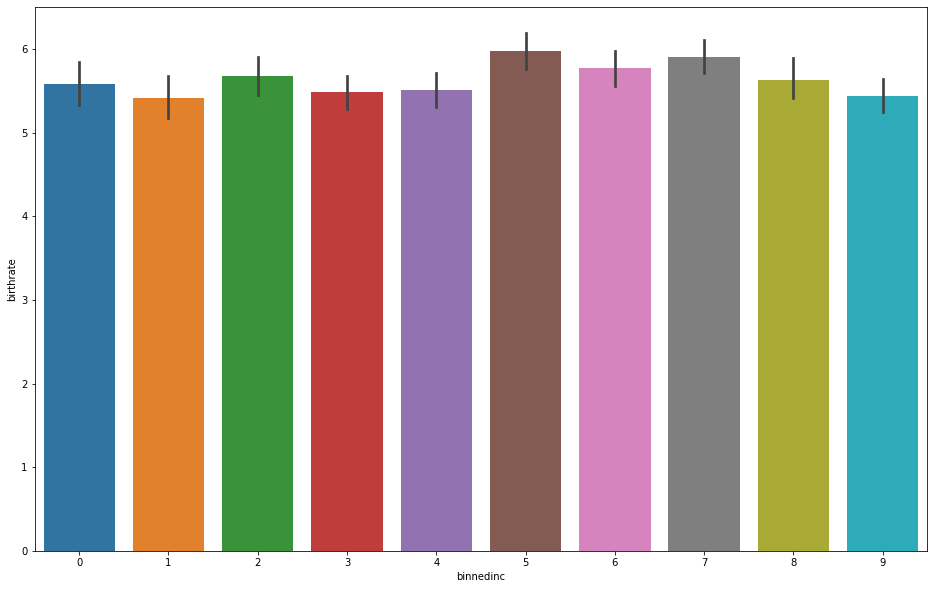

In [17]:
plt.figure(figsize=(16, 10))

sns.barplot(x= 'binnedinc', y='birthrate',
            data=df_data)

<AxesSubplot:xlabel='target_deathrate', ylabel='Count'>

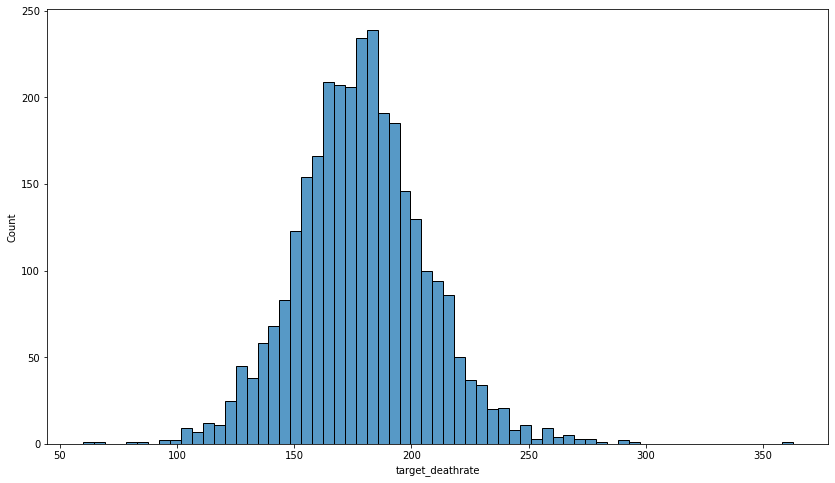

In [18]:
# View distribution of target variable

plt.figure(figsize=(14, 8))
sns.histplot(x='target_deathrate', data=df_data)

<AxesSubplot:xlabel='binnedinc', ylabel='povertypercent'>

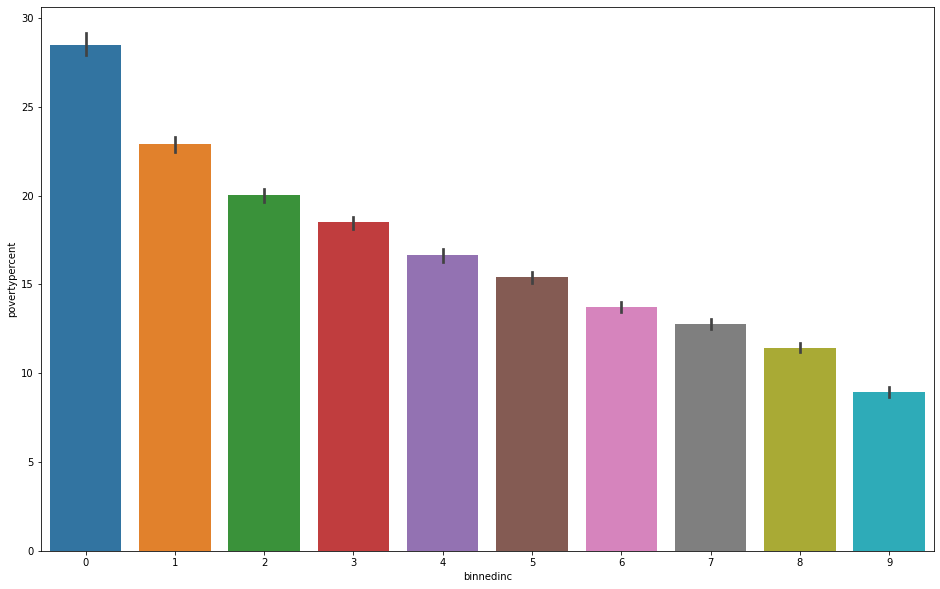

In [19]:
# Relatiionship between income category and poverty level

plt.figure(figsize=(16, 10))

sns.barplot(x= 'binnedinc', y='povertypercent',
            data=df_data)

In [20]:
df_data.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                    int64
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                    int16
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack                   float64
pctasian            

<AxesSubplot:xlabel='target_deathrate', ylabel='povertypercent'>

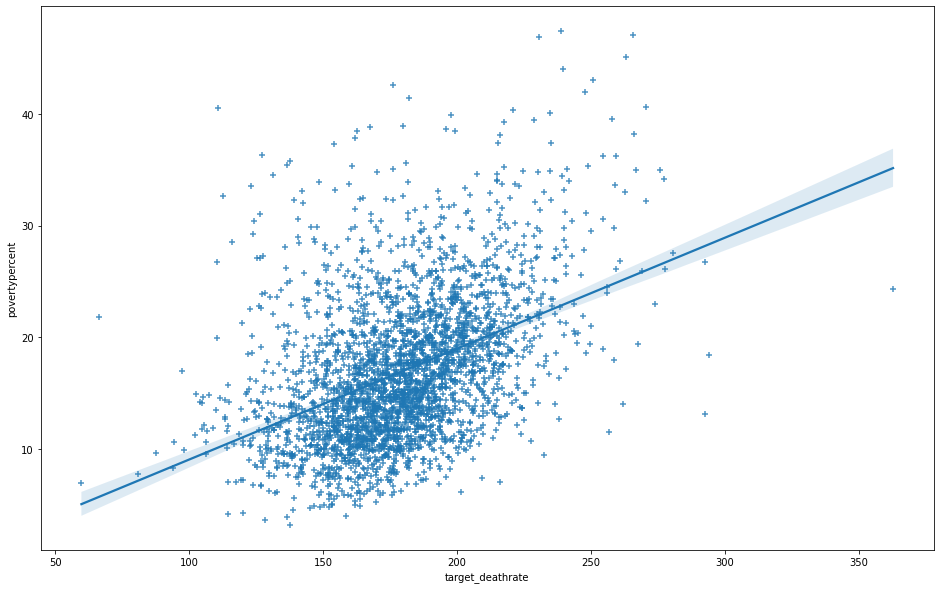

In [21]:
# Find if correlation between death rate and poverty level exist

plt.figure(figsize=(16, 10))

sns.regplot(x='target_deathrate', y='povertypercent',
            data=df_data, marker='+')

<AxesSubplot:xlabel='target_deathrate', ylabel='povertypercent'>

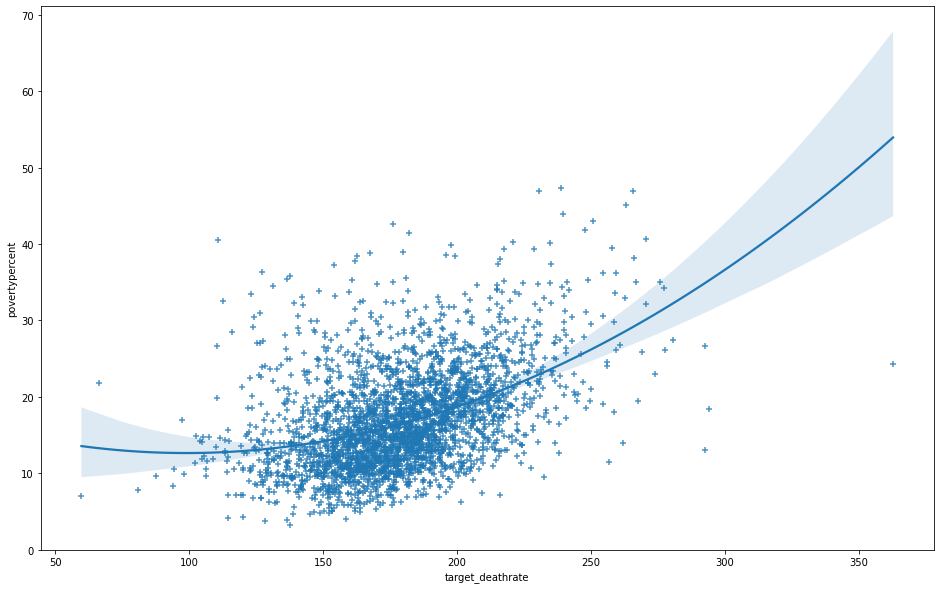

In [22]:
# Find if correlation between death rate and poverty level exist

plt.figure(figsize=(16, 10))

sns.regplot(x='target_deathrate', y='povertypercent',
            data=df_data, marker='+', order=2)

In [23]:
df_data[['target_deathrate', 'pctunemployed16_over', 'povertypercent','incidencerate','pctpubliccoverage','pctprivatecoverage']].corr()

,target_deathrate,pctunemployed16_over,povertypercent,incidencerate,pctpubliccoverage,pctprivatecoverage
target_deathrate,1.000000,0.378412,0.429389,0.449432,0.404572,-0.386066
pctunemployed16_over,0.378412,1.000000,0.655148,0.099979,0.529821,-0.634317
povertypercent,0.429389,0.655148,1.000000,0.009046,0.651162,-0.822534
incidencerate,0.449432,0.099979,0.009046,1.000000,0.046109,0.105174
pctpubliccoverage,0.404572,0.529821,0.651162,0.046109,1.000000,-0.720012
pctprivatecoverage,-0.386066,-0.634317,-0.822534,0.105174,-0.720012,1.000000


<AxesSubplot:xlabel='pctpubliccoverage', ylabel='povertypercent'>

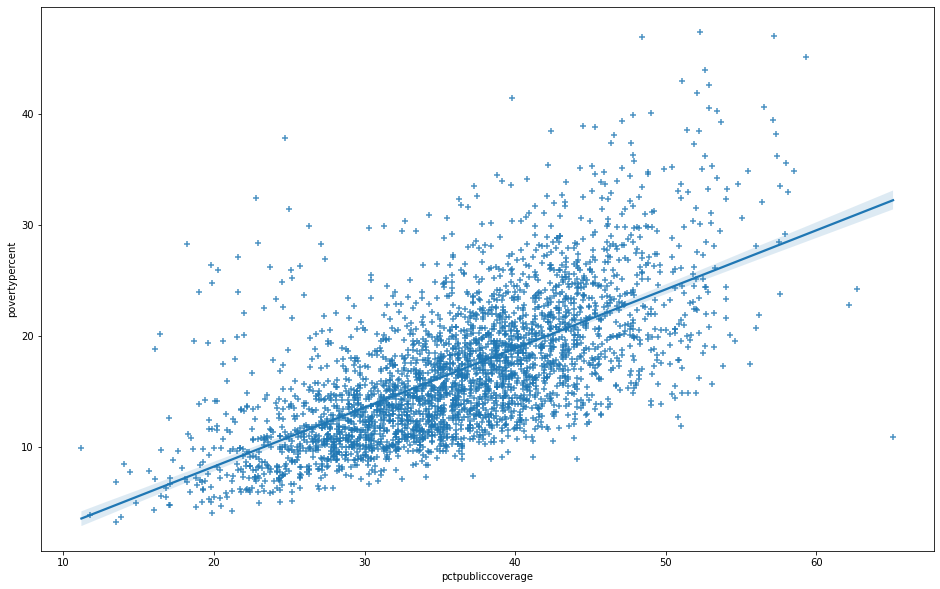

In [24]:
# Find if correlation between public health coverage and poverty level exist

plt.figure(figsize=(16, 10))

sns.regplot(x='pctpubliccoverage', y='povertypercent',
            data=df_data, marker='+')

<AxesSubplot:xlabel='pctpubliccoverage', ylabel='povertypercent'>

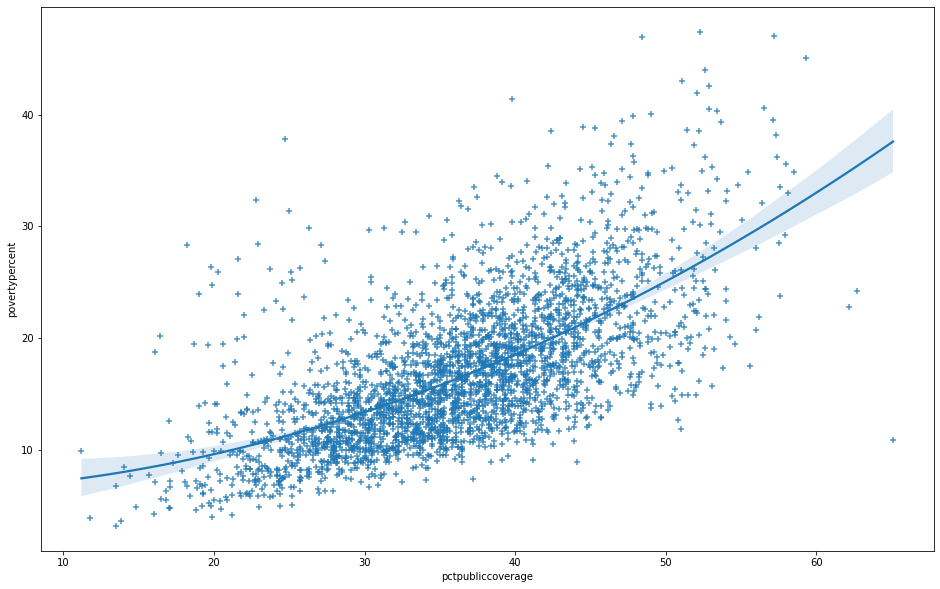

In [25]:
# Find if correlation between public health coverage and poverty level exist

plt.figure(figsize=(16, 10))

sns.regplot(x='pctpubliccoverage', y='povertypercent',
            data=df_data, marker='+', order=2)

Positive correlation exists between percentage of people with public health coverage and poverty level. Correlation is stronger at a higher order. 

<AxesSubplot:xlabel='pctprivatecoverage', ylabel='povertypercent'>

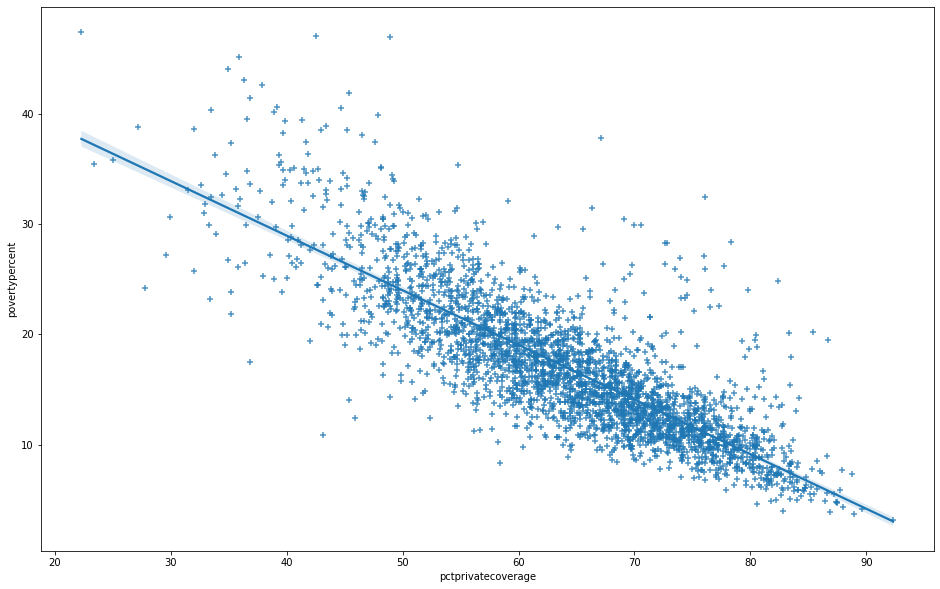

In [26]:
# Find if correlation between public health coverage and poverty level exist

plt.figure(figsize=(16, 10))

sns.regplot(x='pctprivatecoverage', y='povertypercent',
            data=df_data, marker='+')

A strong negative correlation exists between poverty level and percentage of persons with private health insurance

### Feature Engineering

In [28]:
# Separate categorical features

discrete_features = df_data[cat_col].values

In [30]:
target = df_data.pop('target_deathrate')

In [31]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(df_data, target, discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores, name = 'MI scores', index=df_data.columns)

mi_scores = mi_scores.sort_values(ascending=False)

IndexError: index 1458 is out of bounds for axis 0 with size 31